In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv(r"C:\Users\abinc\OneDrive\Desktop\Bengaluru_House_Data.csv")
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df.shape

(13320, 9)

**The dataset consist of 13320 rows and 9 columns**

In [4]:
df.tail(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.00


* **area_type** - type of area in which each property is located
* **availability** - Readiness of the property for occupancy by the buyer
* **location** - Location of the property
* **size** - Number of rooms the property has
* **society** - Society in which the property belongs
* **total_sqft** - Total Square Feet Area of the property
* **bath** - Number of bathroom the property has
* **balcony** - Number of balcony the property has
* **price** - Price of the property

In [5]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

**Some features like area_type, balcony, society, availability  are are not relevant for making predictions so we will drop them**

In [7]:
#dropping the non relevent columns
df1 = df.drop(['area_type', 'availability','society','balcony'], axis = 1)

In [8]:
df1.shape

(13320, 5)

**Now the dataset consist of 13320 rows and 5 columns**

In [9]:
df1.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [10]:
# Displaying information about the DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [11]:
# Displaying the data types of each column in the DataFrame
df1.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [12]:
# descriptive statistics for the DataFrame
df1.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


## Exploratory Data Analysis

**location**

In [13]:
#top 25 location of the property
df1['location'].value_counts().head(25)

Whitefield                  540
Sarjapur  Road              399
Electronic City             302
Kanakpura Road              273
Thanisandra                 234
Yelahanka                   213
Uttarahalli                 186
Hebbal                      177
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           152
Hennur Road                 152
7th Phase JP Nagar          149
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                107
Chandapura                  100
Bellandur                    96
KR Puram                     91
Electronics City Phase 1     88
Hoodi                        88
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     82
Kasavanhalli                 80
Name: location, dtype: int64

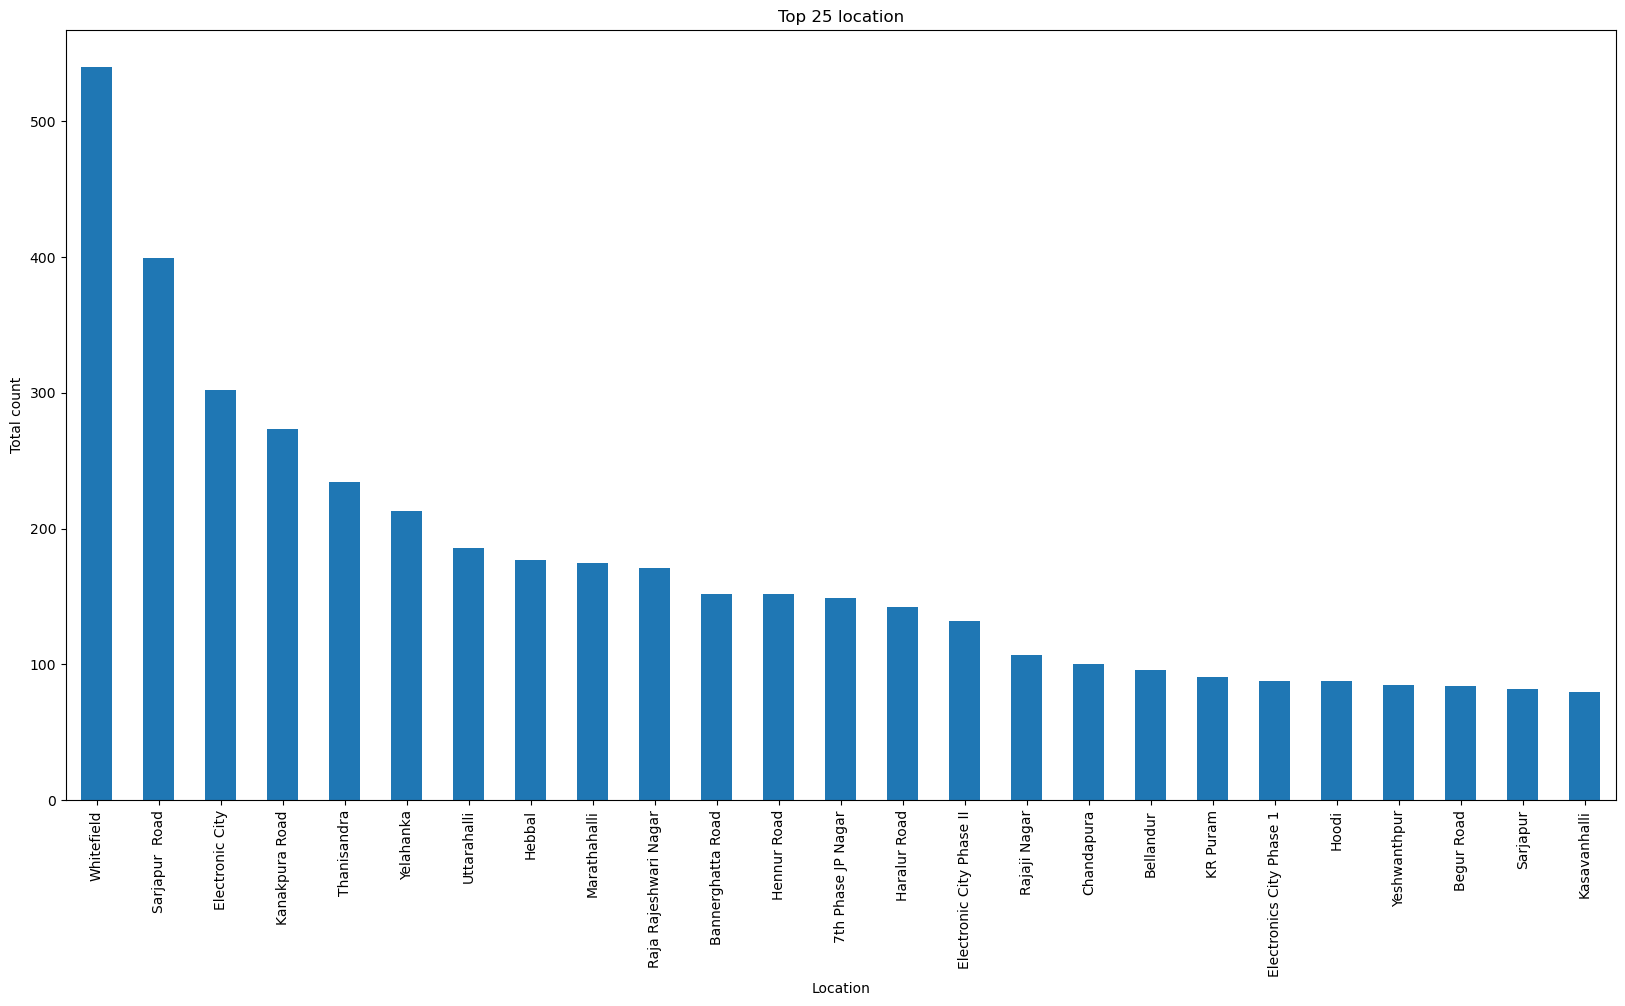

In [14]:
df1['location'].value_counts().head(25).plot.bar()
plt.title('Top 25 location')
plt.xlabel('Location')
plt.ylabel('Total count')
plt.show()

**size**

In [15]:
df1['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

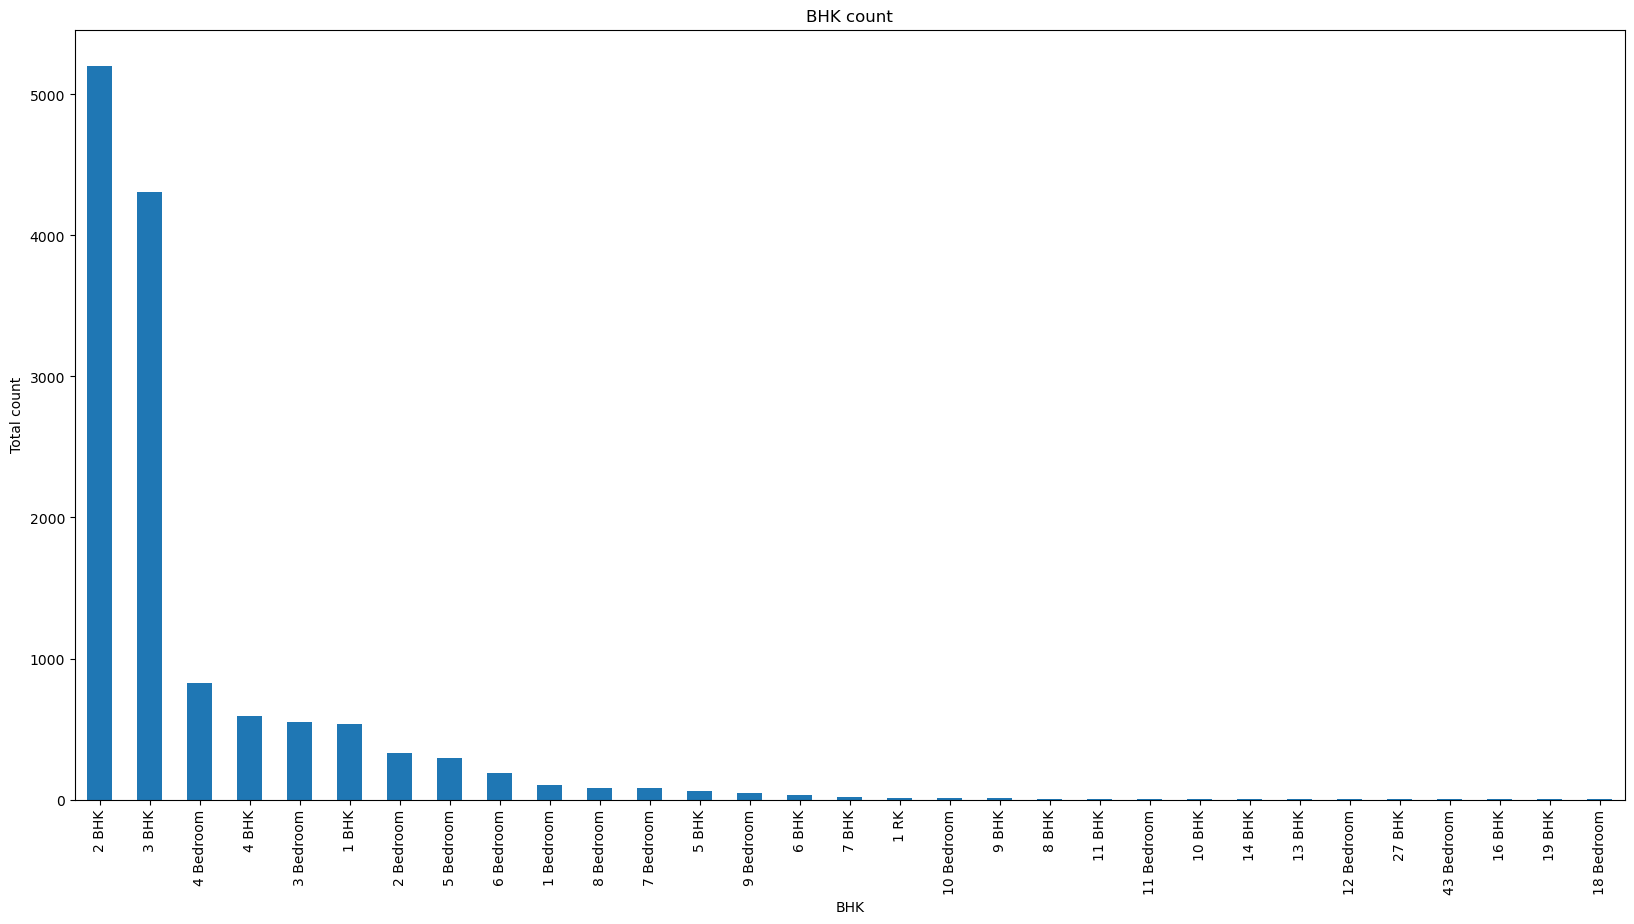

In [16]:
df1['size'].value_counts().plot.bar()
plt.title('BHK count')
plt.xlabel('BHK')
plt.ylabel('Total count')
plt.show()

**total_sqft**

In [17]:
df1['total_sqft'].describe()

count     13320
unique     2117
top        1200
freq        843
Name: total_sqft, dtype: object

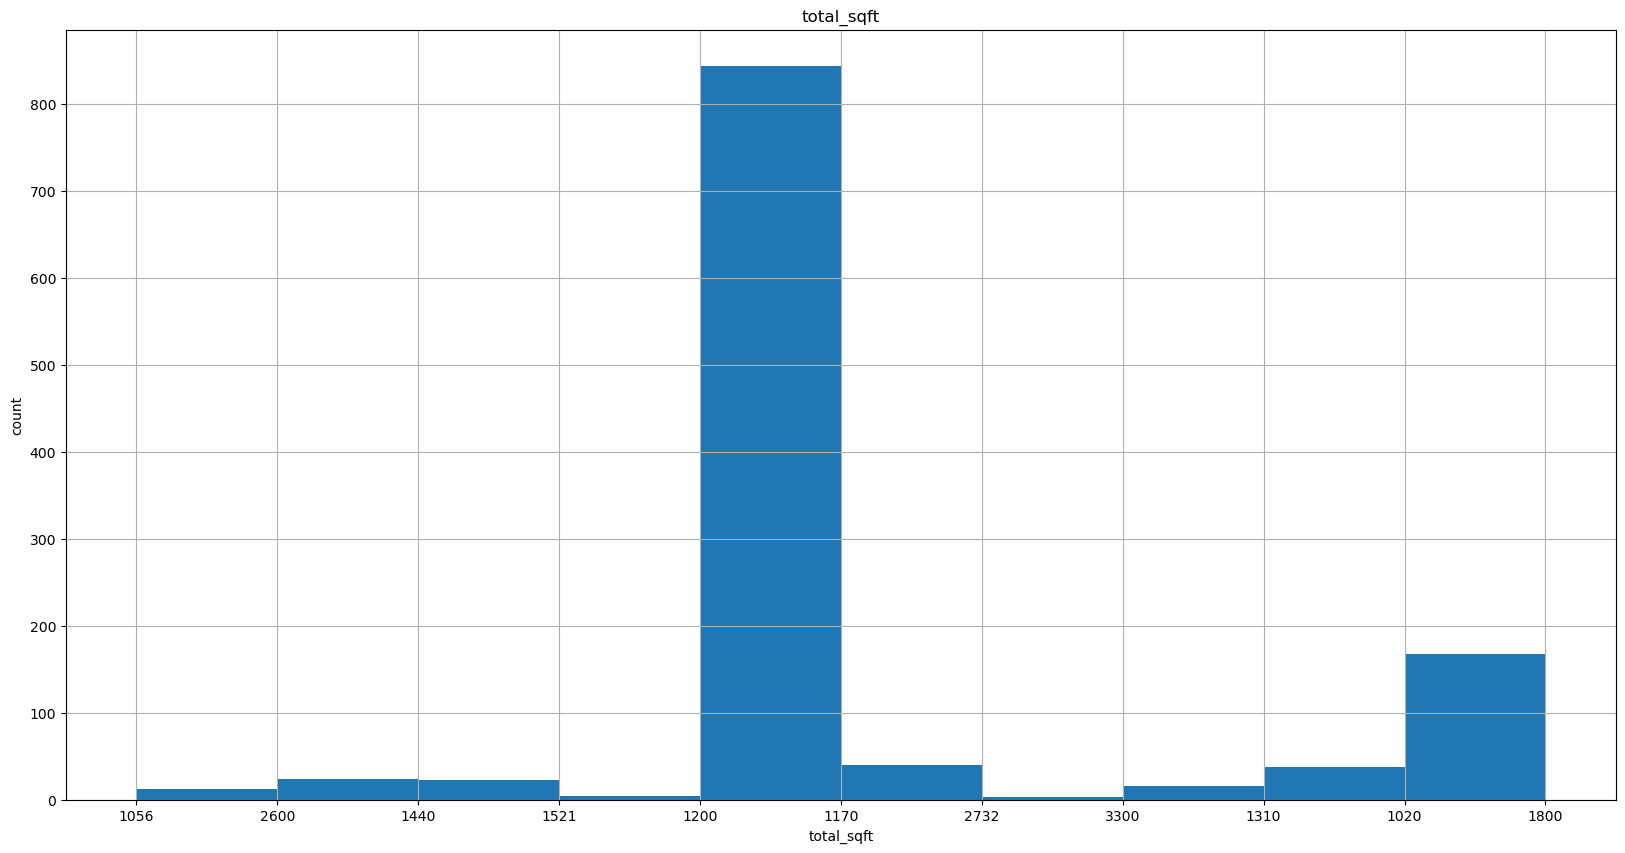

In [18]:
df1['total_sqft'].hist(range =[0,10])
plt.xlabel('total_sqft')
plt.ylabel('count')
plt.title('total_sqft')
plt.show() 

**bath**

In [19]:
df1['bath'].describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [20]:
df1['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

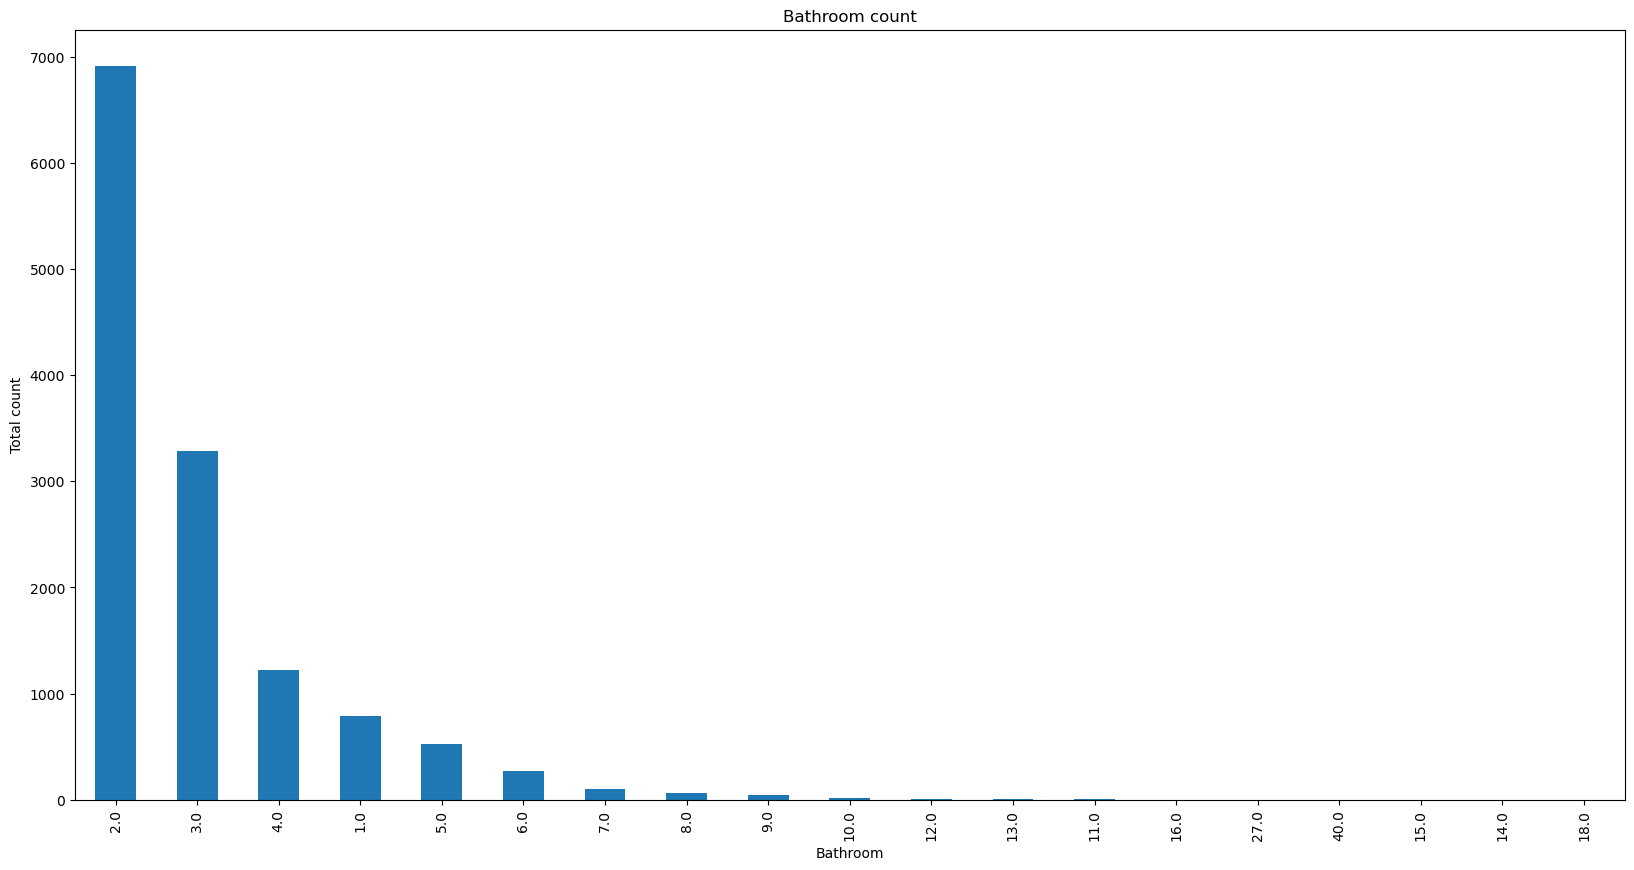

In [21]:
df1['bath'].value_counts().plot.bar()
plt.title('Bathroom count')
plt.xlabel('Bathroom')
plt.ylabel('Total count')
plt.show()

**price**

In [22]:
df1['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

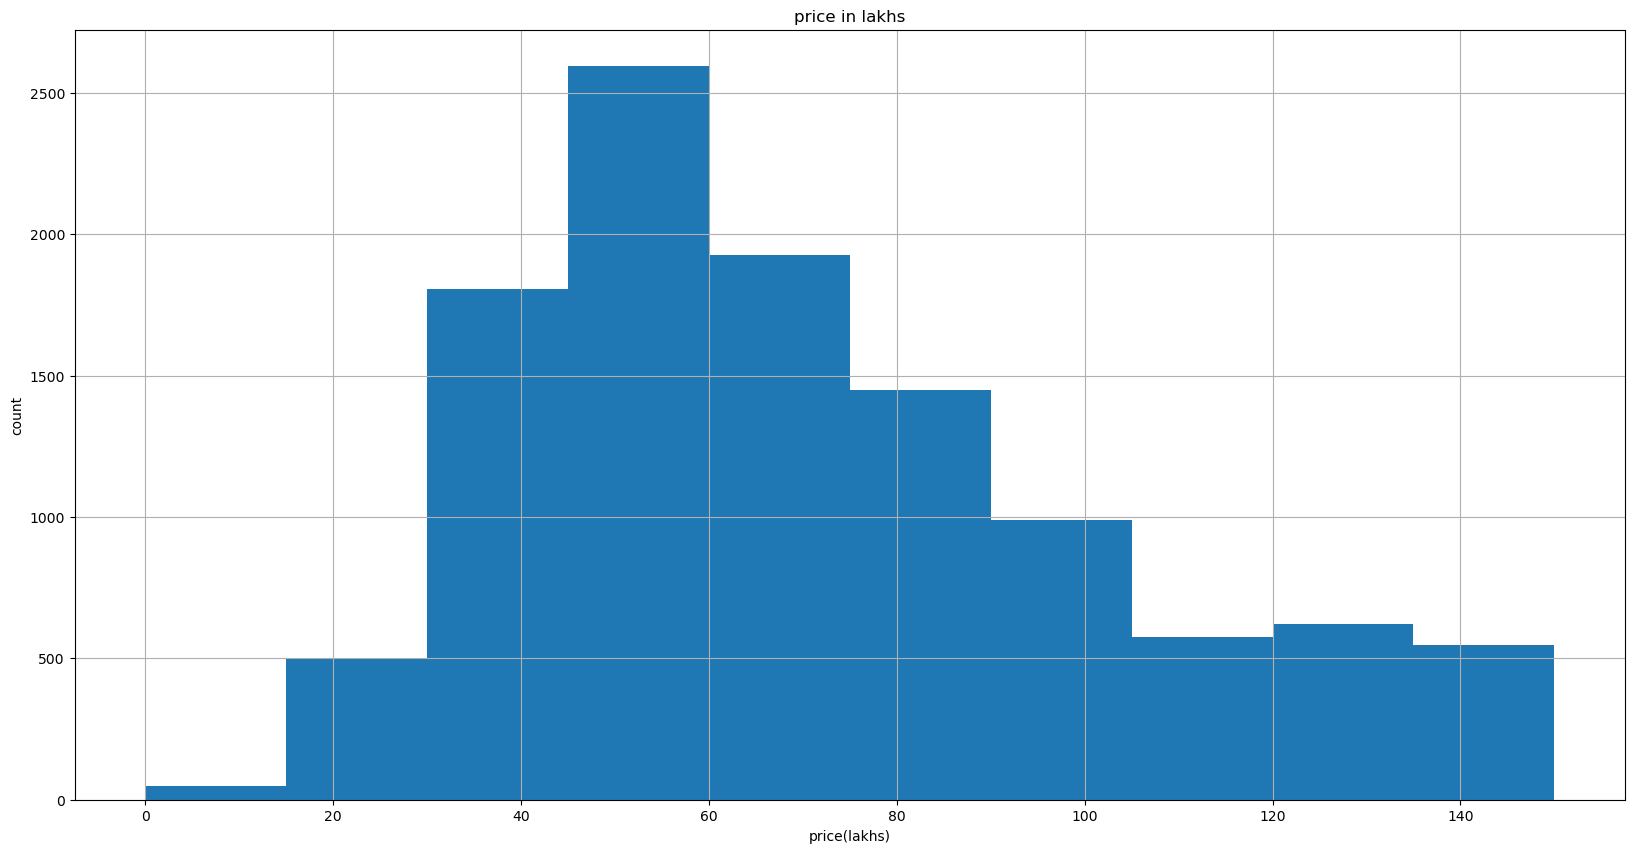

In [23]:
df1['price'].hist(range =[0,150])
plt.xlabel('price(lakhs)')
plt.ylabel('count')
plt.title('price in lakhs')
plt.show()

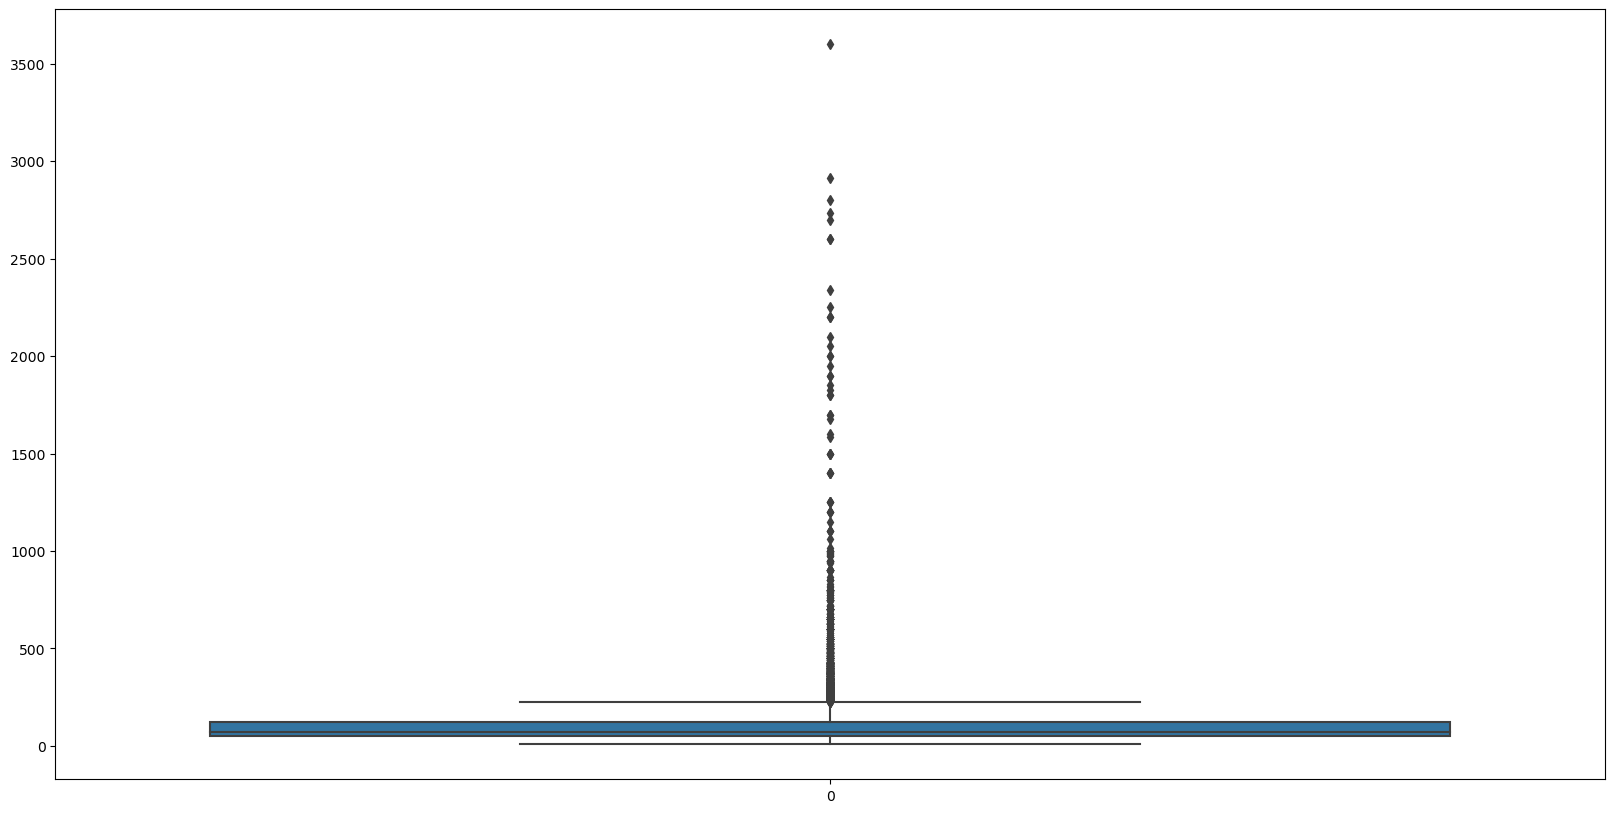

In [24]:
sns.boxplot(data = df1['price'])
plt.show()

## Data Preprocessing

In [28]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

**The dataset has missing values in size, location and bath columns, but since it's a small percentage of the total rows. Here, we have more than 13300 data, so we will choose to remove the NaN values.**

In [29]:
#dropping the missing values
df2 = df1.dropna()

In [30]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

**Now there is no missing values**

In [31]:
df2.shape

(13246, 5)

**Now the dataset consist of 13246 rows and 5 columns**

**size**

In [32]:
# unique values in size column
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

**From the above we can clearly see that Bedroom is represented with 2 different methods. One is BHK and the other one is Bedroom. So we are making a new column called BHK and we are discarding all the units (like BHK, Bedroom)**

In [33]:
#creating a new column bhk
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\abinc\AppData\Local\Temp\ipykernel_7316\2062606799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [34]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [35]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

<AxesSubplot:xlabel='bhk', ylabel='count'>

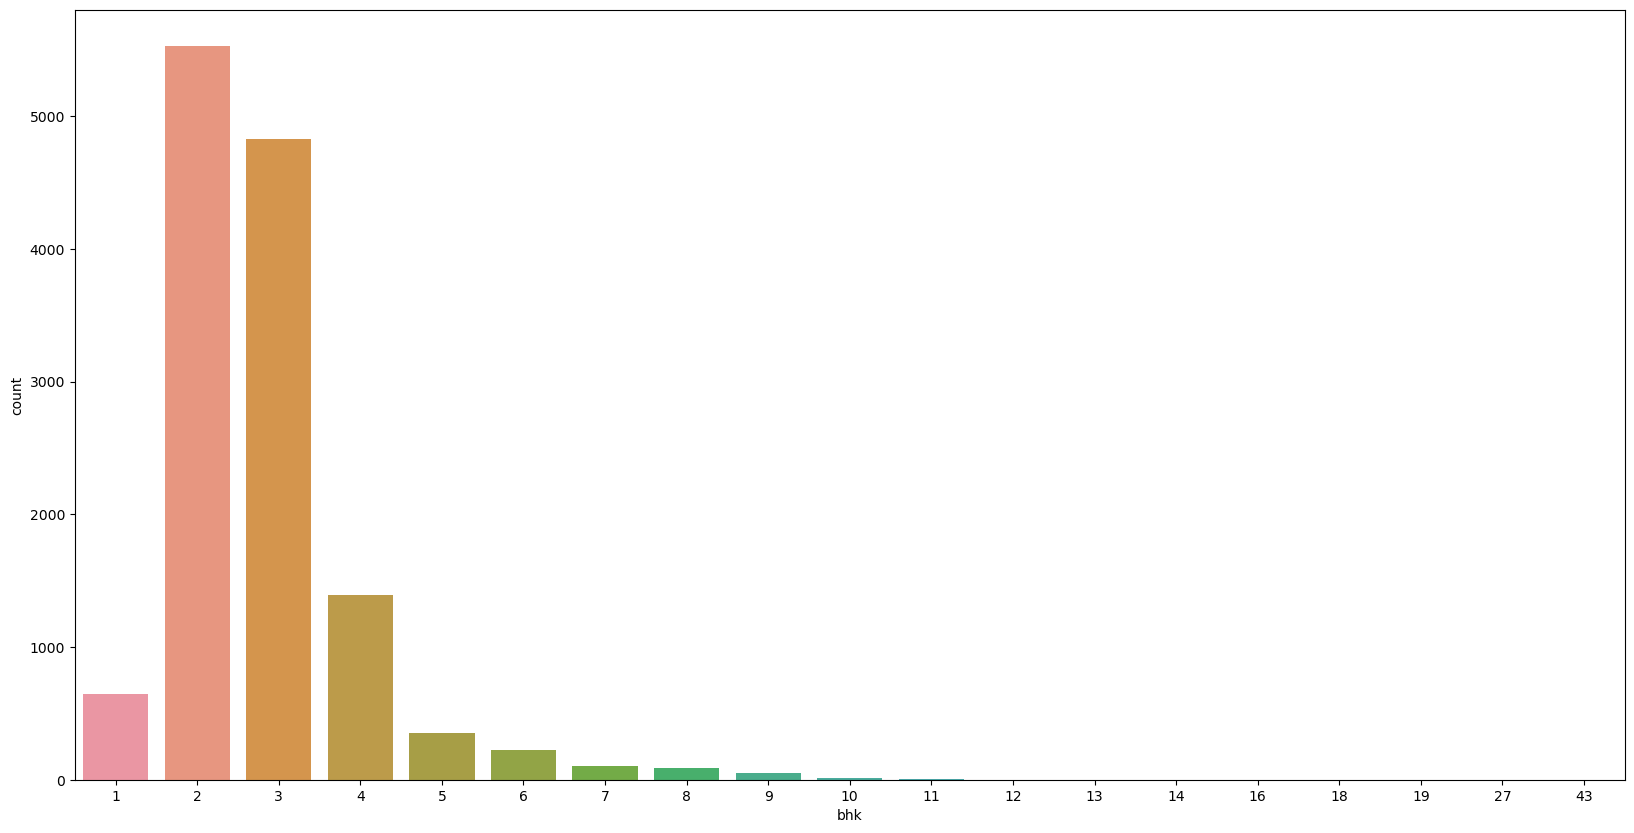

In [36]:
sns.countplot(x = 'bhk', data = df2)

**total_sqft**

In [37]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**From the above we can see that total_sqft are like 1133 - 1384. we need to solve this problem**

In [38]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [39]:
df2[~df2['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


**From the above we can see that total_sqft can be a range (say, 3090-5002). For such cases we can just take average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. So, we are going to just drop such corner cases to keep things simple**

In [40]:
#Converting Sq.Ft to Number
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [41]:
df3 = df2.copy()

In [42]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [43]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [44]:
df4 = df3.copy()

**adding a new feature  price_per_sqft**

In [45]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']

In [46]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**location**

In [47]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [48]:
df4.location.nunique()

1304

In [49]:
location_stats = df4.location.value_counts()
location_stats

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

**Here, we are going to use Dimentionality Reduction to reduce number of locations.**

In [50]:
len(location_stats[location_stats<=10])

1063

In [51]:
loc_less_than_10 = location_stats[location_stats<=10]
loc_less_than_10

Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: location, Length: 1063, dtype: int64

In [52]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in loc_less_than_10 else x)

In [53]:
df4.location.nunique()

242

In [54]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [55]:
df4.shape

(13246, 7)

**Normally a square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft). If you have (say 400 sqft) apartment with 2 bhk than that seems suspicious and can kept as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [56]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [57]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]

In [58]:
df5.shape

(12502, 7)

In [59]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**There is a wide variation in property prices. So we should remove outliers per location using mean and one Standard Deviation**

In [60]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft < (m+sd))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out

In [61]:
df6 = remove_pps_outliers(df5)
df6.shape

(10244, 7)

In [62]:
#Ploting the Scatter Chart for 2 BHK and 3 BHK properties
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location ) & (df.bhk == 2)]
    bhk3 = df[(df.location == location ) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft , bhk2.price , color = 'blue' , label = '2 BHK' , s = 50)
    plt.scatter(bhk3.total_sqft , bhk3.price , marker = '+' ,  color = 'green' , label = '3 BHK' , s = 50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price (Lakhs Indian Rupees)')
    plt.title('Location')
    plt.legend()

Text(0.5, 1.0, 'Scatter Chart for 2 BHK and 3 BHK properties in Rajaji Nagar')

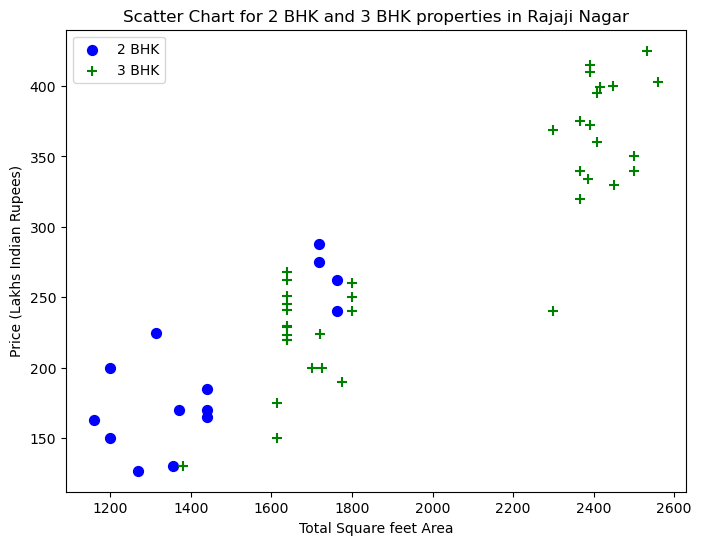

In [88]:
plot_scatter_chart(df6 , 'Rajaji Nagar')
plt.title('Scatter Chart for 2 BHK and 3 BHK properties in Rajaji Nagar')

**we can see that around 1700 Total Square feet Area that some 2bhk houses have more price than the 3 bhk houses. we will remove this abnormality. We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area).**

In [63]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices , axis = 'index')

In [64]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7342, 7)

Text(0.5, 1.0, 'Scatter Chart for 2 BHK and 3 BHK properties in Rajaji Nagar')

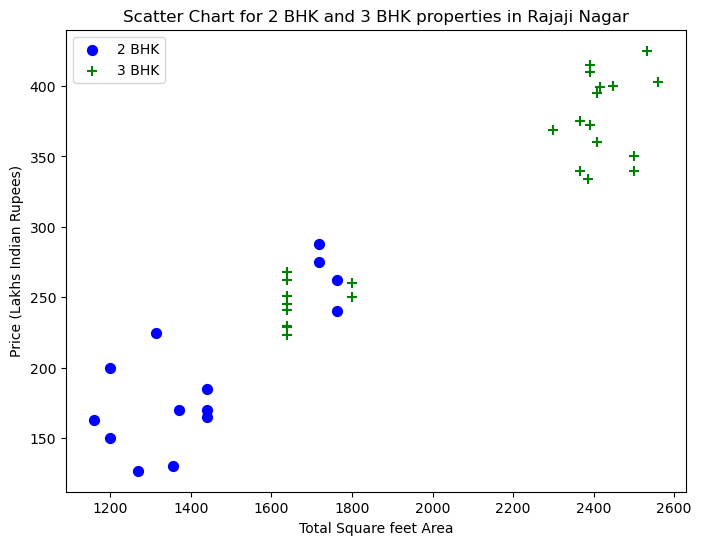

In [65]:
plot_scatter_chart(df7 , 'Rajaji Nagar')
plt.title('Scatter Chart for 2 BHK and 3 BHK properties in Rajaji Nagar')

Text(0, 0.5, 'Count')

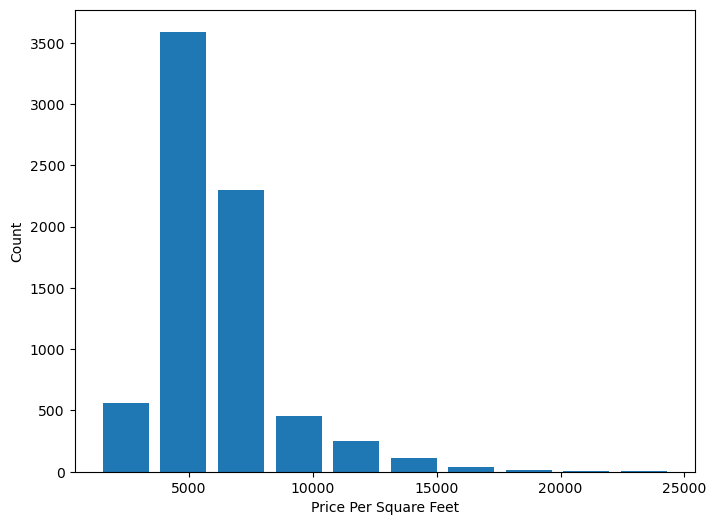

In [66]:
#Ploting the histogram for Price Per Square Feet vs Count¶
plt.hist(df7.price_per_sqft , rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

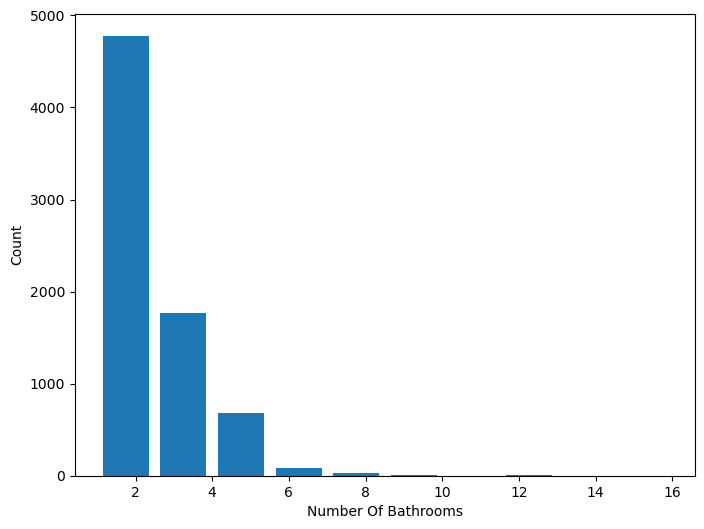

In [67]:
#Ploting the histogram for Number of bathrooms vs Count¶
plt.hist(df7['bath'] , rwidth = 0.8)
plt.xlabel('Number Of Bathrooms')
plt.ylabel('Count')

In [68]:
df7['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [69]:
df7[df7['bath'] > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we need to discard them.**

In [70]:
df7[df7.bath > (df7.bhk+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [71]:
df8 = df7[df7.bath< df7.bhk+2]
df8.shape

(7264, 7)

**In our dataset we have a size column , but we have already bhk column. Also the price_per_sqft column was created to remove outliers. Now we have no use of size and price_per_sqft columns, therefore we will drop them.**

In [72]:
df9 = df8.drop(['size' , 'price_per_sqft'] , axis = 'columns')
df9.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


**One - Hot Encoding**

In [73]:
dummies = pd.get_dummies(df9['location'])
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df10 = pd.concat([df9 , dummies.drop('other' , axis = 'columns')] , axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#Dropping location column
df11 = df10.drop('location' , axis = 'columns')
df11.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**train_test_split**

In [77]:
X = df11.drop('price' , axis = 'columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y = df11.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

**We will train our model using 80% of the DataFrame and will test our model using 20% of the DataFrame.**

## Model Selection

**Linear Regression**

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

print('R-squared score: %.2f' % r2_score(y_test, y_pred))

R-squared score: 0.86


**ShuffleSplit cross-validation**

ShuffleSplit is useful when we have a large dataset

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores = cross_val_score(LinearRegression(), X, y, cv=cv)

print('R-squared scores:', scores)
print('Mean R-squared score:', scores.mean())


R-squared scores: [0.82622151 0.81408431 0.87757267 0.84822717 0.86091226]
Mean R-squared score: 0.8454035842971932


Here we are using Grid Search CV(hyperparameter tuning) for 3 different types of Regression models:

**1. Linear Regression**

**2. Lasso Regression**

**3. Decision Tree Regression**

In [82]:
from sklearn.model_selection import GridSearchCV

#ignoring  warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#Function to choose the best model
def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])

**Model Evaluation**

In [83]:
#Calling find_best_model
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.845404,{'normalize': False}
1,lasso,0.709515,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.698639,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Model Testing**

In [84]:
def predict_price(location , sqft , bath , bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

**Here we are predicting the house prices based on location, size, bath, and bhk**

In [85]:
predict_price('2nd Phase Judicial Layout' , 1000 , 2 ,2 )


23.894185692006015

In [86]:
predict_price('Indira Nagar' , 1000 , 2 ,2 )


191.0873893346856

In [87]:
predict_price('Indira Nagar' , 6000 , 8 ,6 )


615.4823785946269